## Image to Dots



In [127]:
#Packages used
from PIL import Image             
import numpy as np                
import matplotlib.pyplot as plt   
import requests
from io import BytesIO
import pandas as pd 
import skimage
from skimage import measure
import seaborn as sns

### Grabbing Our Image

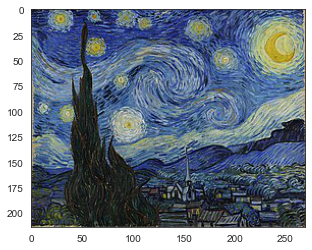

In [147]:
#Grab starry night image from wikipedia
response = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/270px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')
#Convert to image
image = Image.open(BytesIO(response.content))
#View our image
plt.imshow(image)

### Modifying Our Image

A major hurdle in plotting an image is getting the resolution down, since if we don't then we'll have a dataframe with an ungodly amount of rows.


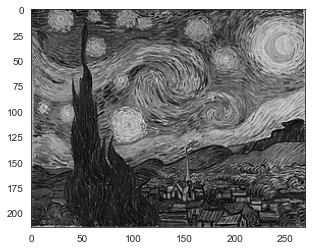

In [161]:
#Convert to black and white so we're only dealing with one color channel
I1 = image.convert('L')
#Convert our image into an array
img_array = np.asarray(I1)
#Convert our black color to 0-1
img_array = img_array/255

#Next, we use downsampling to reduce the image size, specifically downsampling on the max
r = skimage.measure.block_reduce(img_array[:, :],
                         (1, 1),
                         np.max)

#Convert our array into an image
img = Image.fromarray(np.uint8(r * 255) , 'L')

plt.imshow(img, cmap='gray')

### Converting our Image into a Dataframe

In [162]:
#Create an array of colors from the image
colourArray = np.asarray(img).astype(np.int64)

#Create an array of coordinates from the image
indicesArray = np.moveaxis(np.indices(img.size), 0, 2)
indicesArray = np.rot90(indicesArray, 1)

#Combine our image and coordinates array and rehsape
allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 3))

#Convert our image array into a dataframe
df = pd.DataFrame(allArray, columns=["x", "y", "black"])

print(df.shape)



(57780, 3)


### View our Graph/ Image

Text(0.5, 1.0, 'Dataframe Graph')

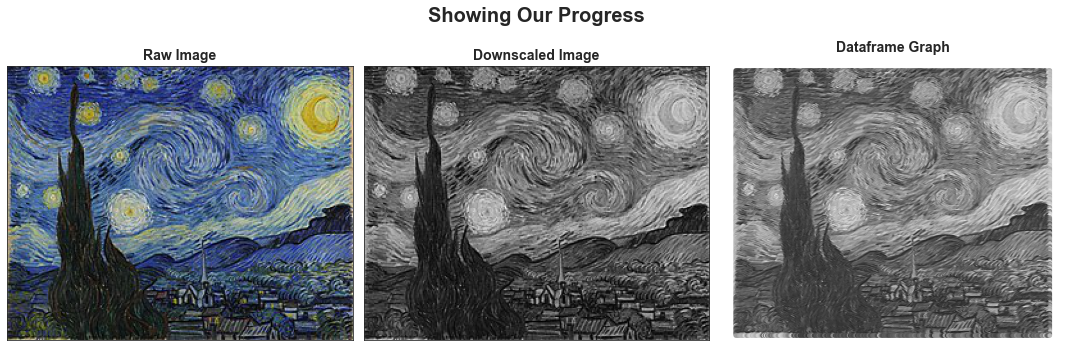

In [169]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False, sharex= False)
fig.suptitle('Showing Our Progress', fontsize=20, weight= 'bold')
fig.set_tight_layout(True)

for i in range(3):
    axes[i].set(yticklabels=[])
    axes[i].set(xticklabels=[])


axes[0].imshow(image)
axes[0].set_title('Raw Image', fontsize=14, weight= 'bold')

axes[1].imshow(img, cmap='gray')
axes[1].set_title('Downscaled Image', fontsize=14, weight= 'bold')

#The plot of our image as a set of x,y coordinates
cmap = sns.dark_palette("white", as_cmap=True)
axes[2].scatter(df['x'], df['y'], c= df['black'], s= 20,
                    cmap=cmap, edgecolor="none")
sns.despine(bottom=True, left=True, ax=axes[2])

axes[2].set_title('Dataframe Graph', fontsize=14,  weight= 'bold')